# House Price Predicting Model Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('train(House_Price).csv')

In [3]:
df_train = pd.DataFrame(data1)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Data Preprocessing

In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train[['Fence','Alley','PoolQC','MiscFeature','MasVnrType','FireplaceQu','LotFrontage','GarageYrBlt']].isnull().sum()

Fence          1179
Alley          1369
PoolQC         1453
MiscFeature    1406
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_train.fillna(df_train['LotFrontage'].mean(),inplace=True)

In [11]:
df_train['GarageYrBlt'].fillna(0, inplace=True)

In [12]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [13]:
df_train=df_train.drop(columns={'Fence','Alley','PoolQC','MiscFeature'},axis=1)

In [14]:
df_train['TotalSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['TotalBsmtSF']
# Drop the individual features if needed
df_train.drop(columns=['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], inplace=True)

In [15]:
df_train['TotalBathrooms'] = df_train['FullBath'] + (df_train['HalfBath'] * 0.5) + df_train['BsmtFullBath'] + (df_train['BsmtHalfBath'] * 0.5)

Bathrooms
FullBath (Above ground full bathrooms)
HalfBath (Above ground half bathrooms)
BsmtFullBath (Basement full bathrooms)
BsmtHalfBath (Basement half bathrooms)

In [16]:
df_train.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath','BsmtHalfBath'], inplace=True)

In [17]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,2566,3.5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,2524,2.5
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,2706,3.5
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,2473,2.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,3343,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,175000,2600,2.5
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2010,WD,Normal,210000,3615,3.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2500,5,2010,WD,Normal,266500,3492,2.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,142125,2156,2.0


In [18]:
num_col = df_train.select_dtypes(include='number').columns

In [19]:
df_train.shape

(1460, 72)

In [20]:
# Calculate Q1, Q3, and IQR
Q1 = df_train[num_col].quantile(0.25)
Q3 = df_train[num_col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df_train[num_col] < lower_bound) | (df_train[num_col] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Id                  0
MSSubClass        103
LotFrontage       106
LotArea            69
OverallQual         2
OverallCond       125
YearBuilt           7
YearRemodAdd        0
MasVnrArea         98
BsmtFinSF1          7
BsmtFinSF2        167
BsmtUnfSF          29
LowQualFinSF       26
GrLivArea          31
BedroomAbvGr       35
KitchenAbvGr       68
TotRmsAbvGrd       30
Fireplaces          5
GarageYrBlt        81
GarageCars          5
GarageArea         21
WoodDeckSF         32
OpenPorchSF        77
EnclosedPorch     208
3SsnPorch          24
ScreenPorch       116
PoolArea            7
MiscVal            52
MoSold              0
YrSold              0
SalePrice          61
TotalSF            25
TotalBathrooms    394
dtype: int64


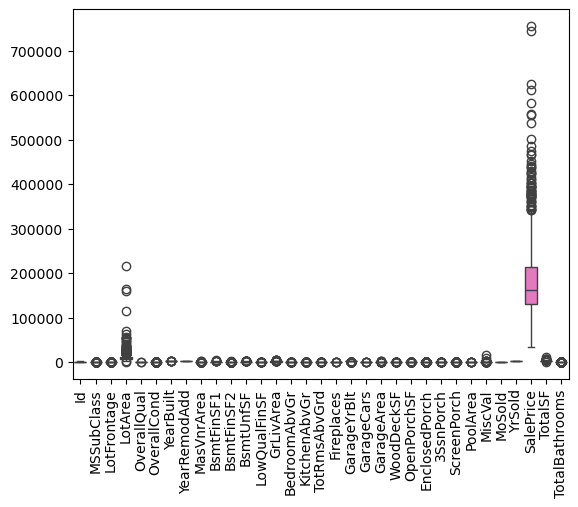

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df_train)
plt.xticks(rotation=90)
plt.show()

In [22]:
def handle_outliers(df, columns):
    for column in columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            #Clip the outlier
            df[column] = df[column].clip(lower_bound,upper_bound)
    return df

In [23]:
df_train = handle_outliers(df_train, num_col)

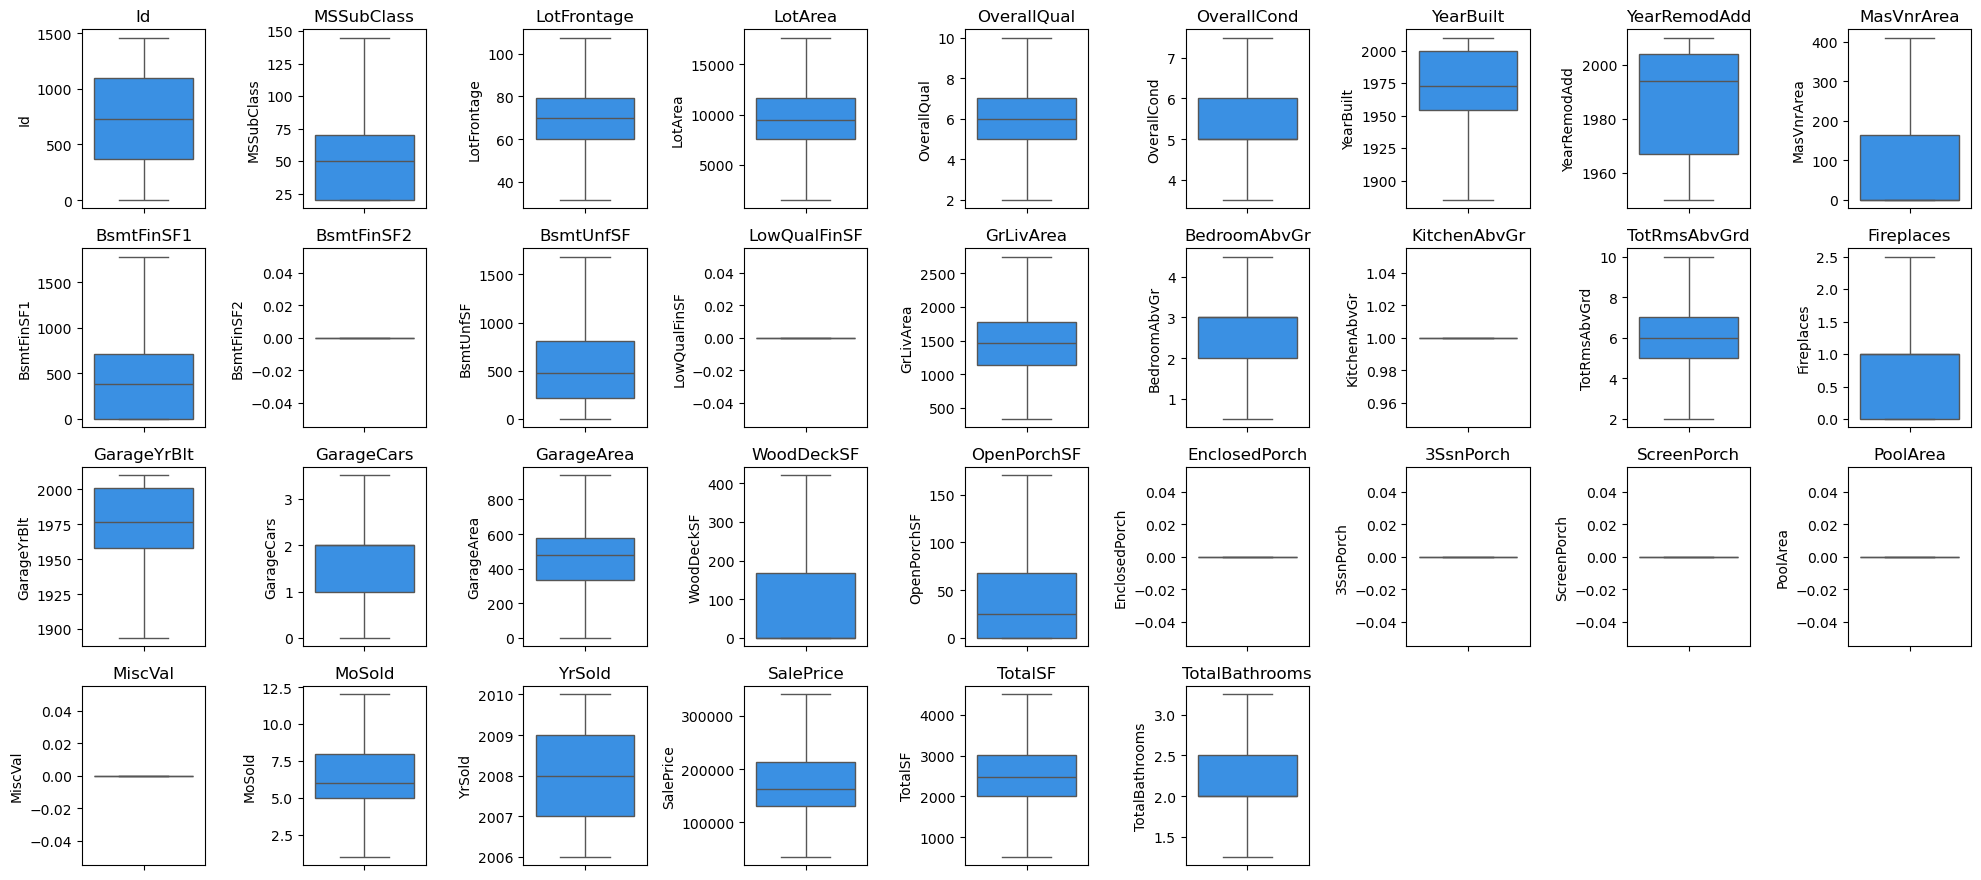

In [24]:
plt.figure(figsize=(20,22))
for i,col in enumerate(num_col):
    plt.subplot(10,9,i+1)
    sns.boxplot(y=df_train[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
skewness = df_train[num_col].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
#print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)


No Skewness:
 Id                0.000000
LotFrontage       0.061947
LotArea           0.208492
OverallQual       0.249513
BsmtFinSF2        0.000000
LowQualFinSF      0.000000
BedroomAbvGr     -0.253298
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.366919
GarageCars       -0.391629
GarageArea       -0.069685
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.212053
YrSold            0.096269
TotalSF           0.442921
TotalBathrooms    0.087391
dtype: float64

Moderate Skewness:
 OverallCond     0.579334
YearBuilt      -0.594020
YearRemodAdd   -0.503562
BsmtFinSF1      0.739877
BsmtUnfSF       0.796931
GrLivArea       0.593556
Fireplaces      0.584655
SalePrice       0.802786
dtype: float64

High Skewness:
 MSSubClass     1.019624
MasVnrArea     1.285286
GarageYrBlt   -1.008565
WoodDeckSF     1.083673
OpenPorchSF    1.136301
dtype: float64


In [26]:
df_train['GarageYrBlt'].isnull().sum()

0

In [27]:
#Applying Square root transfomation
df_train['MSSubClass'] = np.sqrt(df_train['MSSubClass'])
df_train['MasVnrArea'] = np.sqrt(df_train['MasVnrArea'])

#df_train['GarageYrBltF'] = np.sqrt(df_train['GarageYrBlt'])
df_train['GarageYrBlt'] = np.log1p(df_train['GarageYrBlt'])

df_train['WoodDeckSF'] = np.sqrt(df_train['WoodDeckSF'])
df_train['OpenPorchSF'] = np.sqrt(df_train['OpenPorchSF'])

#df_train['SalePrice'] = np.sqrt(df_train['SalePrice'])

skewness = df_train[['MSSubClass','MasVnrArea','GarageYrBlt','WoodDeckSF','OpenPorchSF']].skew()
print("Skewness after transformation:\n", skewness)

Skewness after transformation:
 MSSubClass     0.535419
MasVnrArea     0.758611
GarageYrBlt   -1.042105
WoodDeckSF     0.415737
OpenPorchSF    0.346794
dtype: float64


## Exploratory Data Analysis

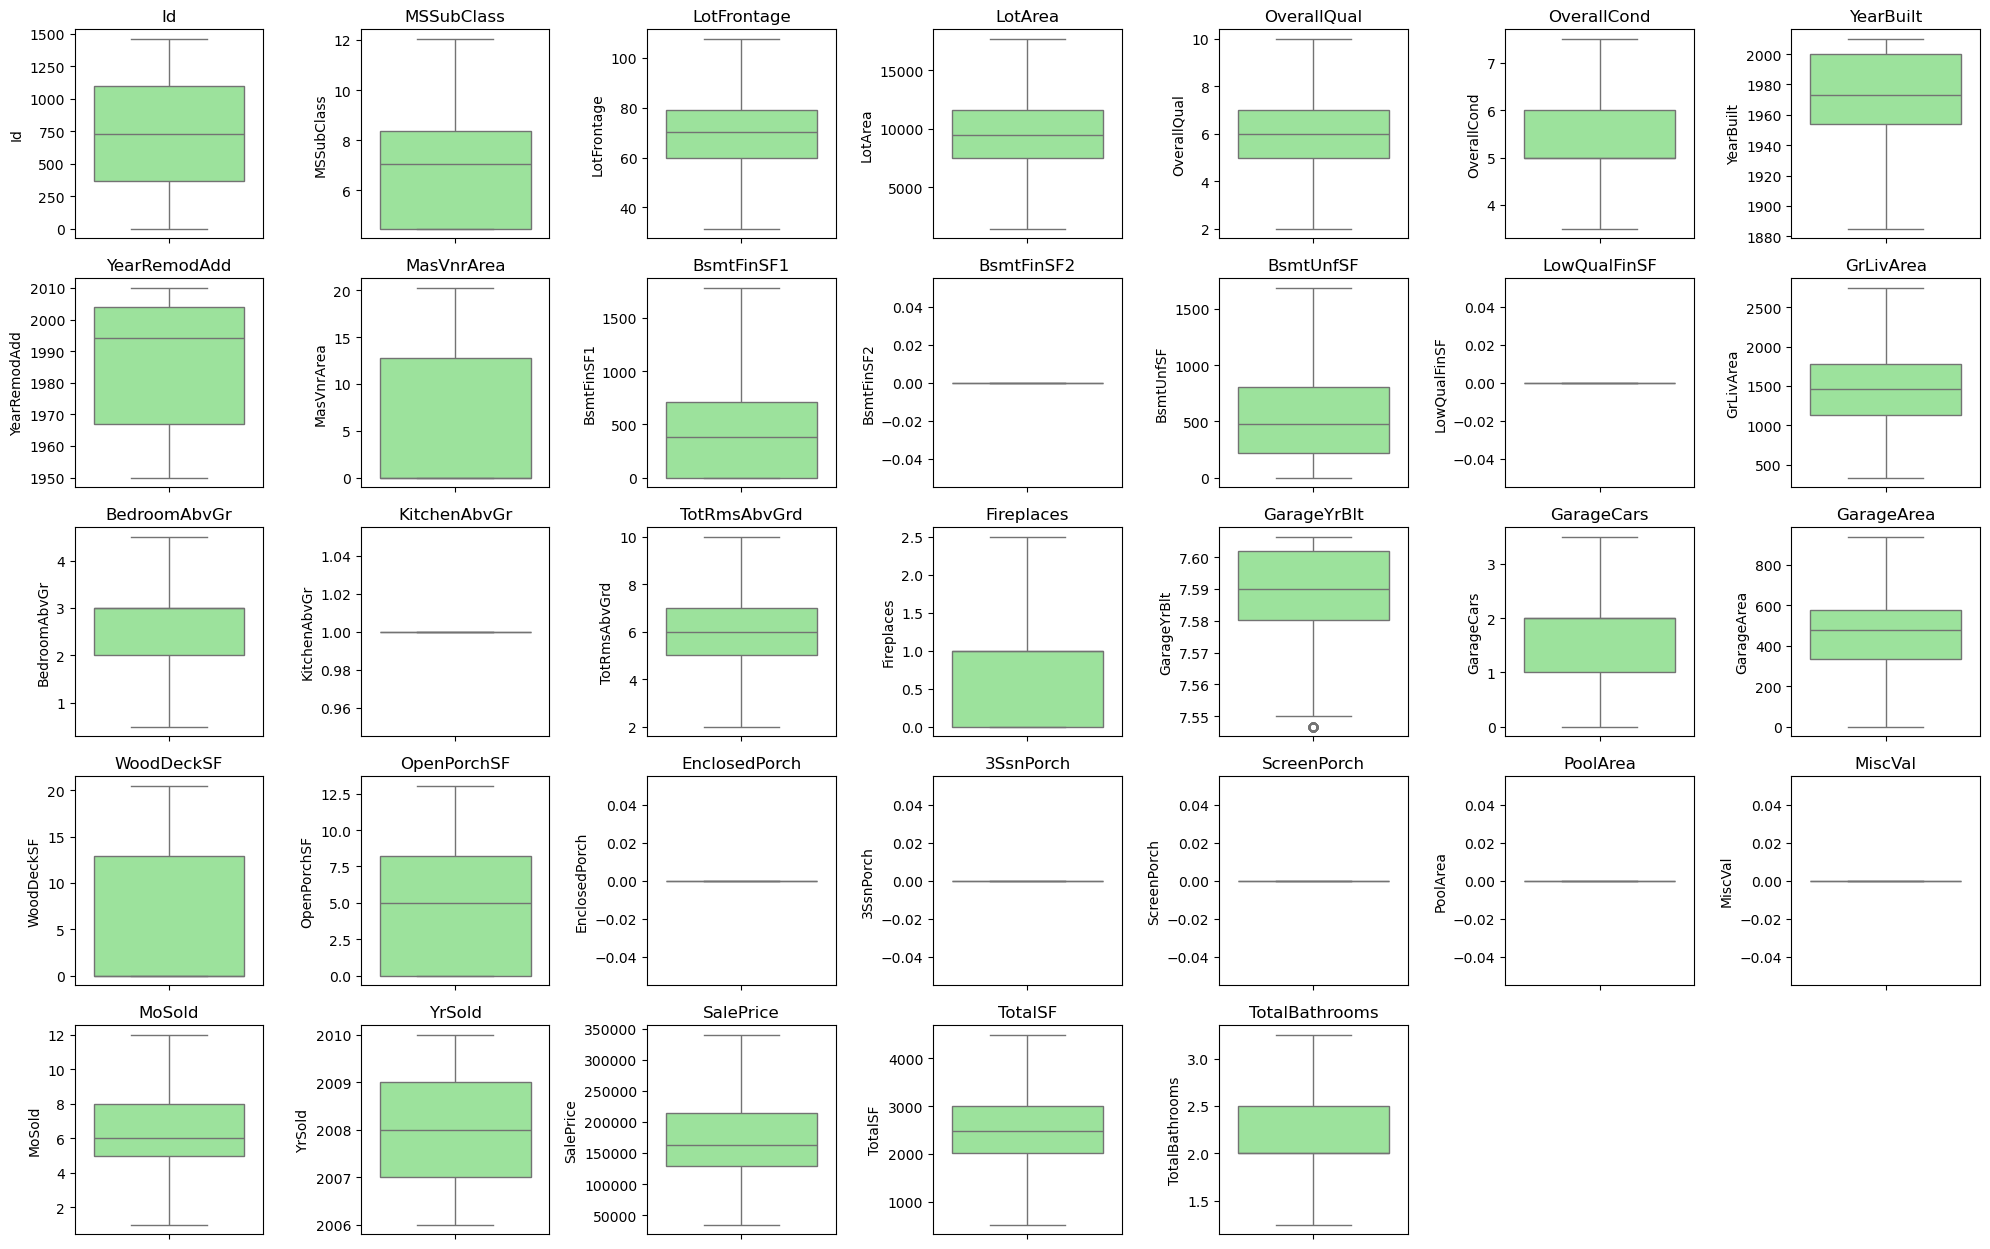

In [28]:
# BoxPlot
plt.figure(figsize=(20,25))
for i,col in enumerate(num_col):
    plt.subplot(10,7,i+1)
    sns.boxplot(y=df_train[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

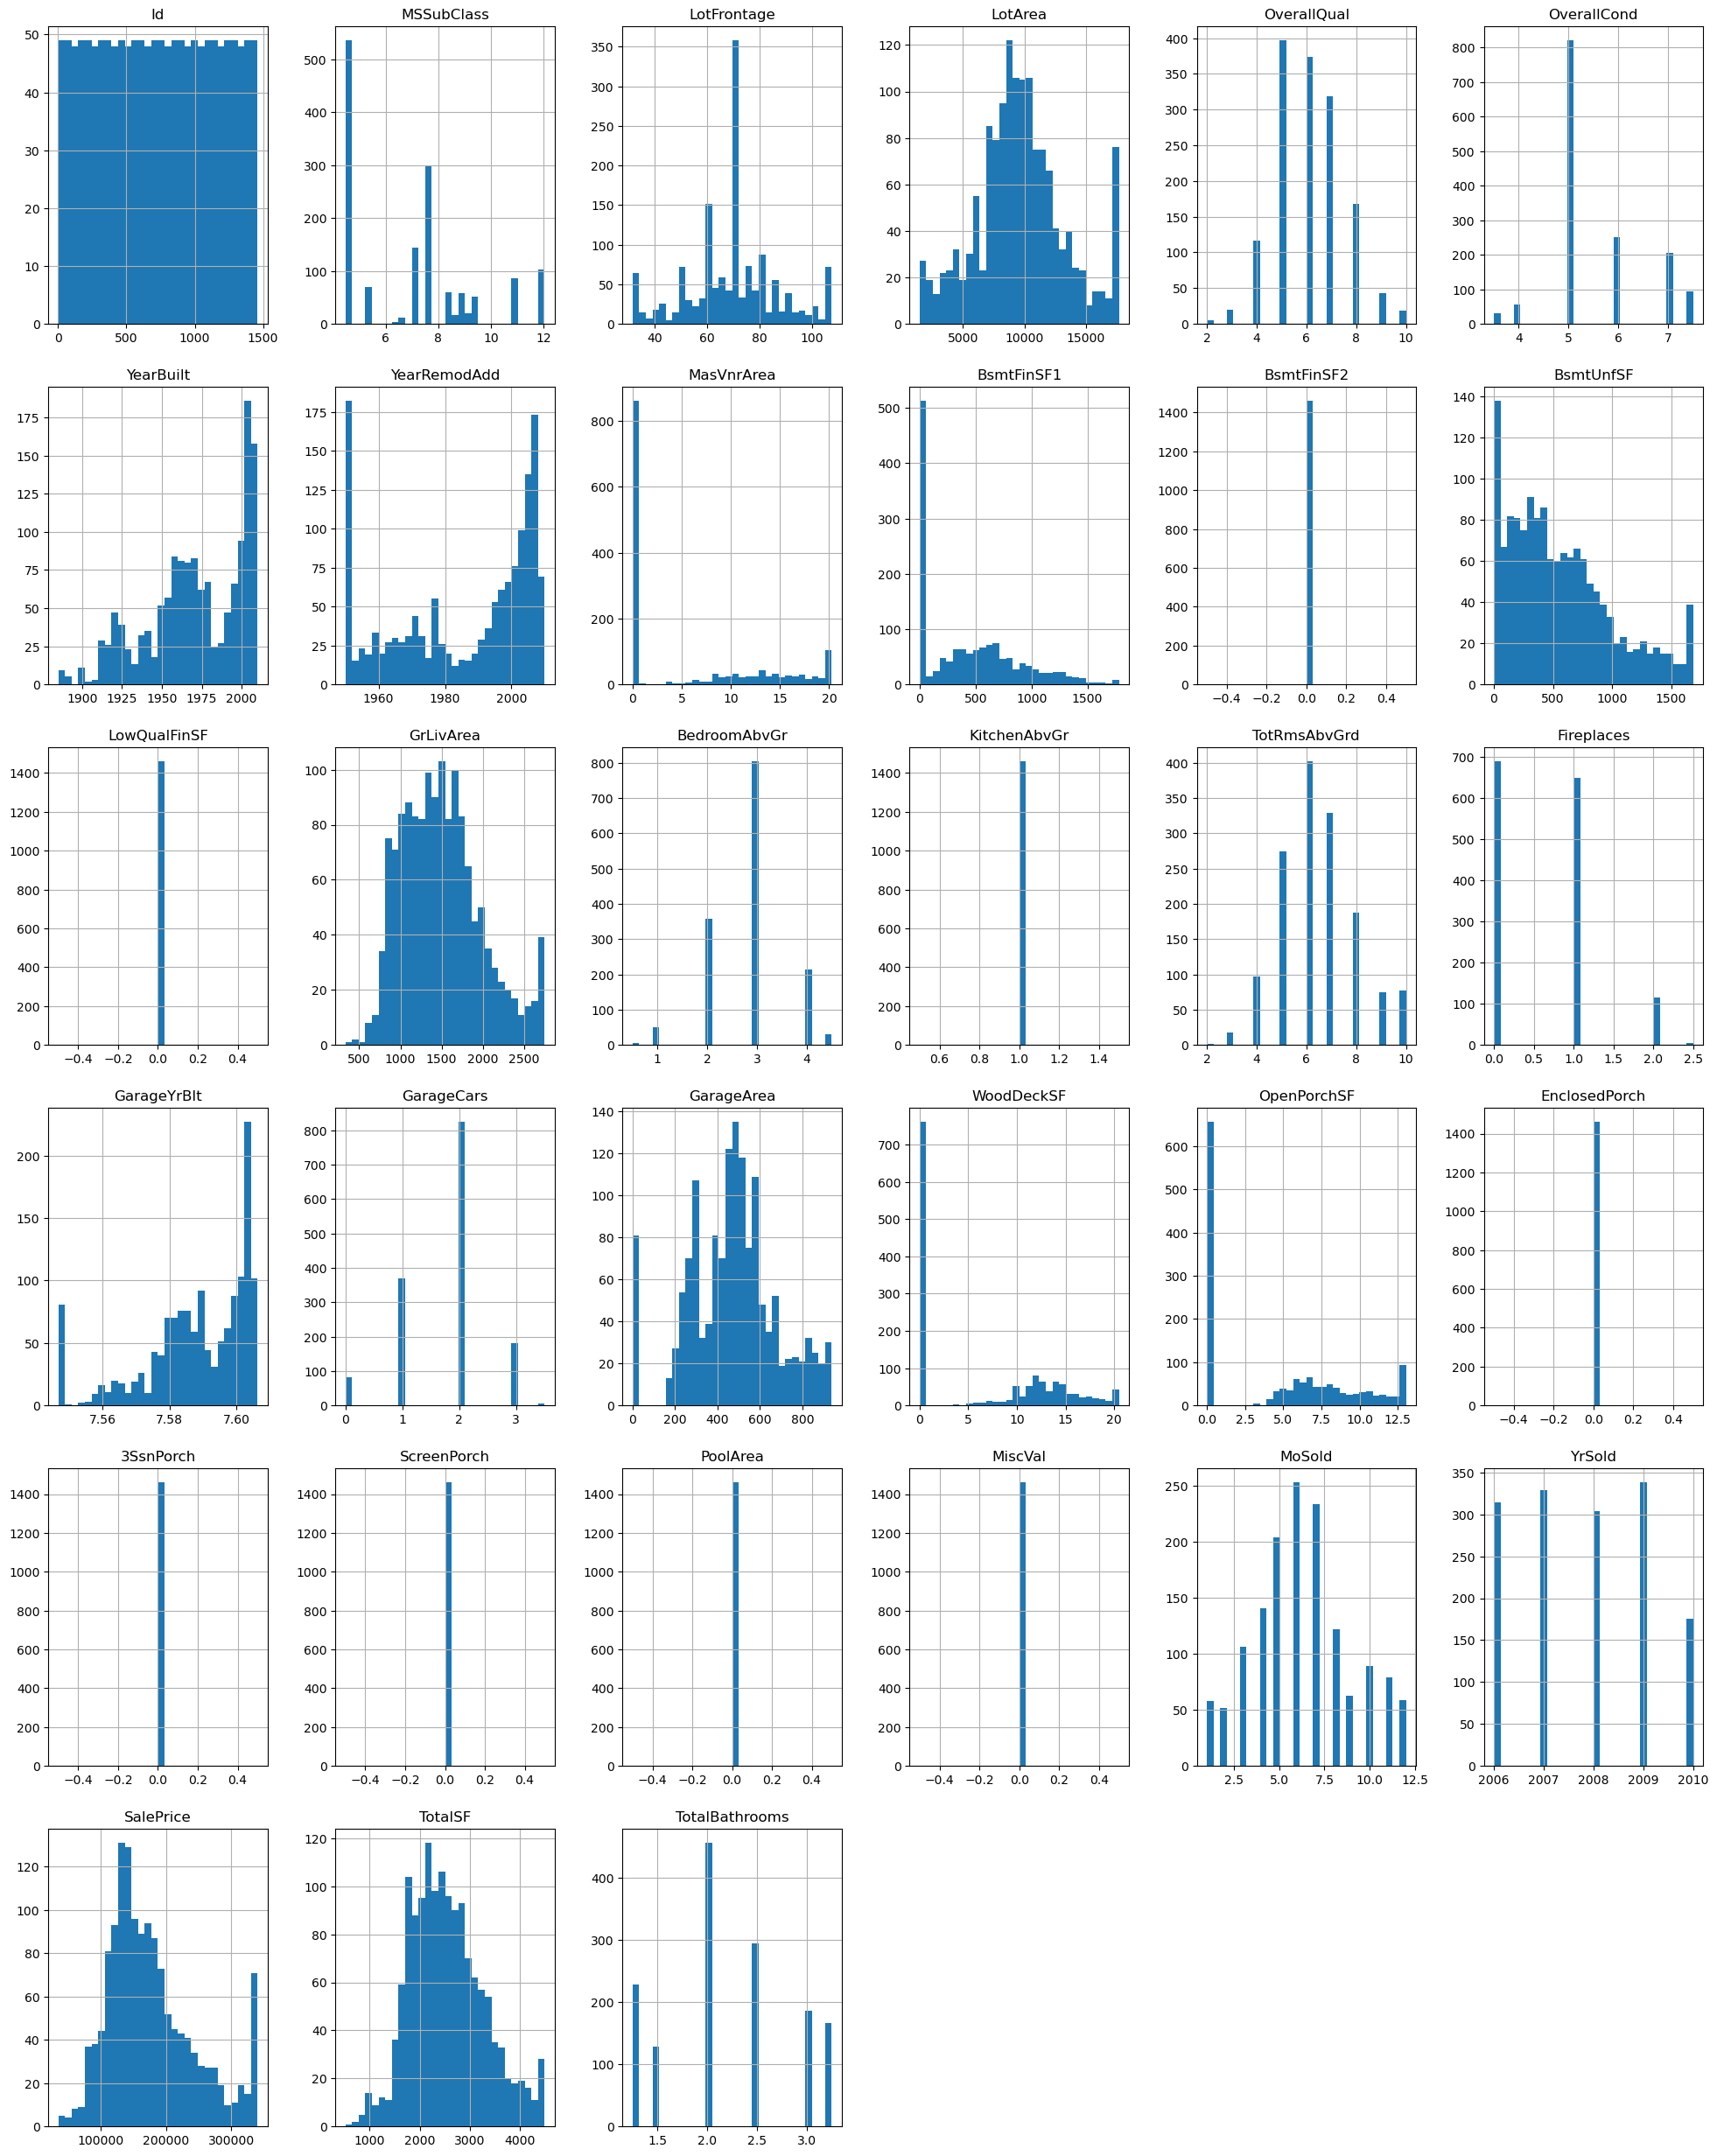

In [29]:
#Histogram
df_train.hist(figsize=(20,25), bins=30)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout(pad=2.0)  
plt.show()

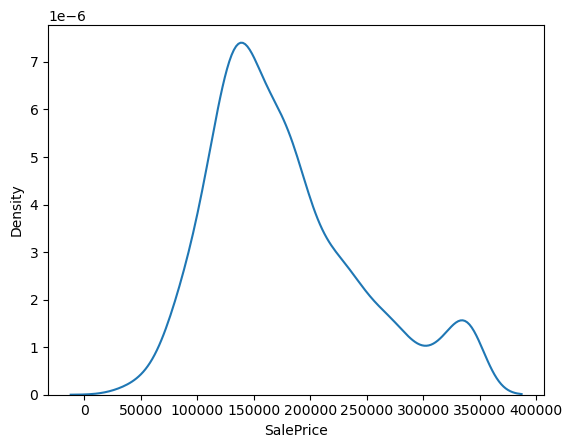

In [30]:
sns.kdeplot(df_train.SalePrice)
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

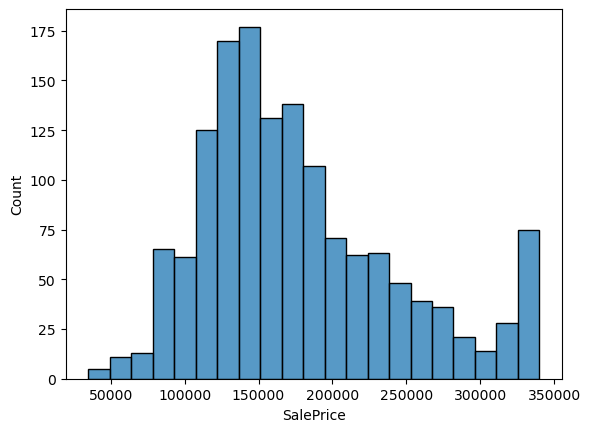

In [31]:
sns.histplot(df_train.SalePrice)

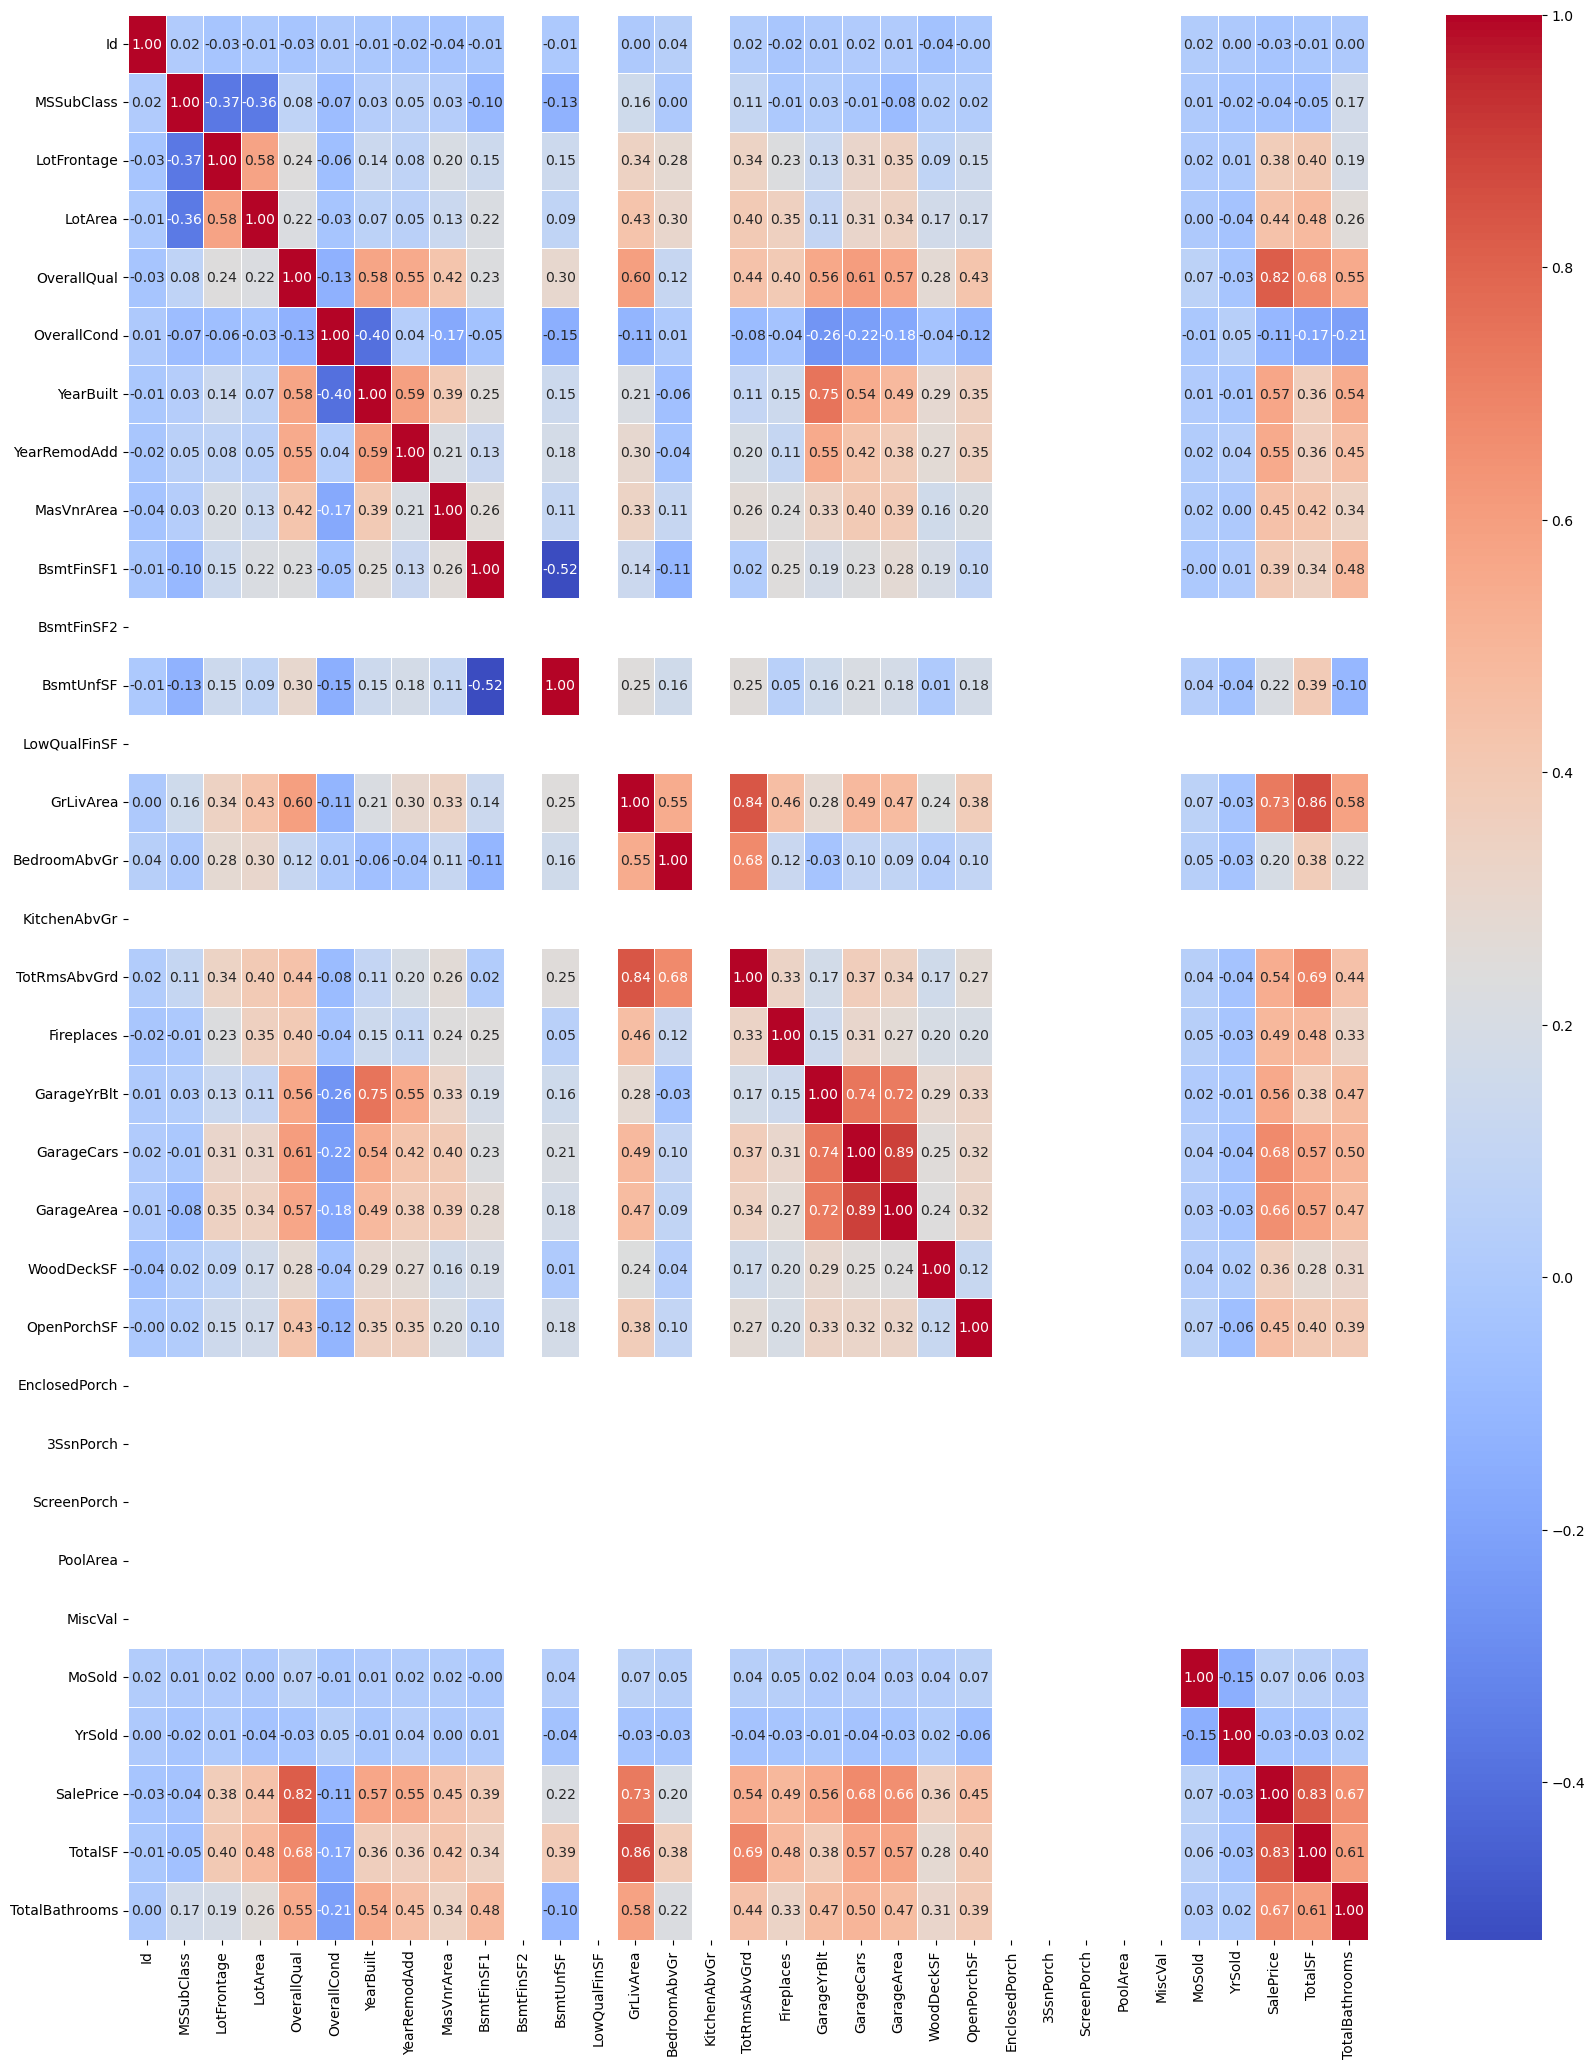

In [32]:
#Heatmap for Correlation
corr1 = df_train[num_col].corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr1, annot=True, fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

## Encoding categorical columns

In [33]:
X = df_train.drop('SalePrice',axis=1)
y = df_train.SalePrice

In [34]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBathrooms
0,1,7.745967,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,2566.0,3.25
1,2,4.472136,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,2524.0,2.50
2,3,7.745967,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,2706.0,3.25
3,4,8.366600,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,2473.0,2.00
4,5,7.745967,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,3343.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7.745967,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,2600.0,2.50
1456,1457,4.472136,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,3615.0,3.00
1457,1458,8.366600,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2010,WD,Normal,3492.0,2.00
1458,1459,4.472136,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,2156.0,2.00


In [35]:
X = pd.get_dummies(X,drop_first=True)

## Feature Selection: Filter Methods

In [36]:
selector = SelectKBest(score_func=f_regression, k=100)

X_selected = selector.fit_transform(X,y)

feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()].to_list()

#print("Selected features:", selected_features)


scores = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
scores_sorted = scores.sort_values(by='Score', ascending=False)
print(scores_sorted)

scores_sorted.to_csv('Feature_Scores.csv',index=False)

           Feature        Score
30         TotalSF  3176.490492
4      OverallQual  2941.534366
13       GrLivArea  1656.684215
19      GarageCars  1226.272213
31  TotalBathrooms  1163.030140
..             ...          ...
24       3SsnPorch     0.000000
23   EnclosedPorch     0.000000
15    KitchenAbvGr     0.000000
12    LowQualFinSF     0.000000
10      BsmtFinSF2     0.000000

[243 rows x 2 columns]


In [37]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [38]:
selected_features = ['TotalSF', 'TotalBathrooms', 'BedroomAbvGr']

X_selected_df = df_train[selected_features]  # Selecting only the important features

In [39]:
X_selected_df

,TotalSF,TotalBathrooms,BedroomAbvGr
0,2566.0,3.25,3.0
1,2524.0,2.50,3.0
2,2706.0,3.25,3.0
3,2473.0,2.00,3.0
4,3343.0,3.25,4.0
...,...,...,...
1455,2600.0,2.50,3.0
1456,3615.0,3.00,3.0
1457,3492.0,2.00,4.0
1458,2156.0,2.00,2.0


## Train_Test_Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size = 0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (1168, 3)
Test set shape (features): (292, 3)
Training set shape (target): (1168,)
Test set shape (target): (292,)


## Model Building

In [43]:
model= LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 25233.03
MSE: 1136986111.82
RMSE: 33719.22
R² Score: 0.7675


## Testing with Unseen data

In [47]:
df_test = pd.read_csv('test_data.csv')

In [48]:
df_test

,TotalSF,TotalBathrooms,BedroomAbvGr
0,1778.0,1.0,2
1,2658.0,1.5,3
2,2557.0,2.5,3
3,2530.0,2.5,3
4,2560.0,2.0,2
...,...,...,...
1454,1638.0,1.5,3
1455,1638.0,1.5,3
1456,2448.0,2.0,4
1457,1882.0,1.5,3


In [49]:
y_pred_unseen = model.predict(df_test)

In [50]:
df_test["PredictedPrice"] = y_pred_unseen
df_test.to_csv("house_price_predictions.csv", index=False)